<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# SC12x

## Statistical Analysis

## 개요

여러분은 코스 수료를 마치고 CodeStates에 DS CA (Coaching  Assistant)로 합류했습니다.

여러분에게 주어진 메인 태스크는 세션 및 수강생 핸들링이지만. 

시간을 짜내어 사이드 프로젝트를 하고 싶어졌습니다.

AIB 팀원들과의 커피타임을 통해 수강생 데이터를 하나 받을 수 있었습니다.

> 기수별 학생들 성취도 데이터인데, 어떤 의미가 있는지 확인해주세요.

### Data Description

- F1 : `N`, `D`
- F2 : `Y`, `N`
- F3 : `A`, `B`, `C`, `D` (기수)
- F4 : Continuous
- F5 : Continuous
- F6 : `A` ~ `H`
- F7 : Continuous
- F8 : `X`, `Y`, `Z`
- F9 : `Y`, `N`

## 1. 다음 링크를 참조하여 데이터를 불러오세요. 

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv>

이후 간단한 전처리를 하세요.


In [206]:
import pandas as pd
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv")

In [207]:
df

,Unnamed: 0,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
1,2,D,N,A,1.608900,0.133612,H,3.0,X,Y
2,3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
3,4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
4,5,N,N,A,1.532721,0.283534,E,4.0,Z,Y
...,...,...,...,...,...,...,...,...,...,...
195,196,N,N,D,2.765327,0.753814,G,5.0,X,Y
196,197,N,Y,D,3.098499,0.637145,G,2.0,Y,Y
197,198,N,N,D,1.613861,0.882830,F,2.0,Z,Y
198,199,N,N,d,3.003789,0.892767,G,4.0,Z,Y


> | 범주형 데이터 : F1, F2, F3, F5, F8, F9 |   


> | 연속형 데이터 : F4, F5, F7 |

수강생 데이터에서 N/D 혹은 N/Y같은 데이터로 유추 가능한 변수
1. 이슈쉐어링 여부  
2. 헬프데스크 질문 여부  
3. 결석(지각3회)여부   
4. 미제출 과제 여부

수치 데이터 유추  
1. 과제 평균(0~3)
2. 스챌 평균(0~3)
3. 과제 백분위(0~1)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   F1          200 non-null    object 
 2   F2          191 non-null    object 
 3   F3          200 non-null    object 
 4   F4          200 non-null    float64
 5   F5          170 non-null    float64
 6   F6          200 non-null    object 
 7   F7          197 non-null    float64
 8   F8          200 non-null    object 
 9   F9          200 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 15.8+ KB


In [209]:
df.isnull().sum()

Unnamed: 0     0
F1             0
F2             9
F3             0
F4             0
F5            30
F6             0
F7             3
F8             0
F9             0
dtype: int64

In [210]:
df=df.fillna(0) # 결측치 의미 -> 미제출 또는 입력 과정에서 실수라고 가정, 미제출일 때  0으로 대체 / 미입력일 때 평균 대체 

In [211]:
# 수치형 데이터 기초통계량
df[['F4','F5','F7']].describe()

,F4,F5,F7
count,200.000000,200.000000,200.000000
mean,2.512655,0.425193,4.860000
std,1.166105,0.321321,2.076526
min,0.022079,0.000000,0.000000
25%,1.732794,0.128679,3.000000
50%,2.546567,0.392518,5.000000
75%,3.311934,0.715038,6.000000
max,5.868967,0.993412,11.000000


변수 살펴보기

In [212]:
# F1
df['F1'].unique()

array(['N', 'D'], dtype=object)

In [213]:
df['F1'].value_counts()

N    164
D     36
Name: F1, dtype: int64

In [214]:
# F2
df['F2'].unique() # 결측치가 0으로 들어간 것 같다

array(['N', 'Y', 0], dtype=object)

In [215]:
df['F2'].value_counts()

N    178
Y     13
0      9
Name: F2, dtype: int64

In [216]:
df['F2'][df['F2'] == 0] = 'N' # 0은 N일 가능성이 높아보이므로 대체
df['F2'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


N    187
Y     13
Name: F2, dtype: int64

In [217]:
df['F3'].unique() # 소문자

array(['A', 'a', 'B', 'b', 'C', 'c', 'D', 'd'], dtype=object)

In [218]:
df['F3'] = df['F3'].str.upper()

In [219]:
df['F3'].unique() # 소문자 변환 -> A, B, C, D (기수)

array(['A', 'B', 'C', 'D'], dtype=object)

In [220]:
df['F3'].value_counts() # 기수 1~4를 A,B,C,D로 표현한 듯 하다

C    50
B    50
D    50
A    50
Name: F3, dtype: int64

In [221]:
df['F6'].unique() # A~H

array(['H', 'F', 'E', 'C', 'G', 'D', 'B'], dtype=object)

In [222]:
df['F6'].value_counts() # B가 제일 적고 H가 제일 많은 걸 봐선 점수를 학점처럼 A~H의 구간으로 등급을 나눠둔게 아닐까 싶은데 일단 뒤에서 점수와 검정을 해봐야겠다.

H    83
G    49
F    38
E    18
D     6
C     5
B     1
Name: F6, dtype: int64

In [223]:
df['F8'].unique()

array(['Y', 'X', 'Z'], dtype=object)

In [224]:
df['F8'].value_counts()  # 과제 1,2,3점?

Y    99
Z    58
X    43
Name: F8, dtype: int64

In [225]:
df['F9'].unique()

array(['Y', 'N'], dtype=object)

In [226]:
df['F9'].value_counts()

N    111
Y     89
Name: F9, dtype: int64

## 2. **F3**에 따라서 다른 Feature들이 어떤 경향을 나타내는지 해석해보세요.

- categorical feature의 경우 crosstab을 사용하여 [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)과 chi-square를 시도해 볼 수 있습니다.

- continuous feature의 경우 여러 시각화와 t-test를 할 수 있을 겁니다.

- 이를 바탕으로 **가장 유의미한** 그리고 **가장 무의미한** feature를 찾아보세요.

여기서 여러분들의 목표는 

`F3`에 따라서 다른 feature들이 영향이 있는지 없는지를 알아보는 

**가설검정** 입니다.

따라서 데이터 탐색 및 시각화 작업에 너무 많은 시간을 쏟지 마세요. 이것은 사이드 프로젝트 입니다.

In [227]:
# 이 곳에 답안을 작성하시기 바랍니다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   F1          200 non-null    object 
 2   F2          200 non-null    object 
 3   F3          200 non-null    object 
 4   F4          200 non-null    float64
 5   F5          200 non-null    float64
 6   F6          200 non-null    object 
 7   F7          200 non-null    float64
 8   F8          200 non-null    object 
 9   F9          200 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 15.8+ KB


### 범주형 crosstab (F1, F2, F6, F8, F9 vs F3)

In [228]:
import pandas as pd

df1 = pd.crosstab(df['F1'], df['F3']) # 기수와 딱히 상관 없이 N은 대부분 40정도 나오는 것 같다
df1

F3,A,B,C,D
F1,,,,
D,6,9,10,11
N,44,41,40,39


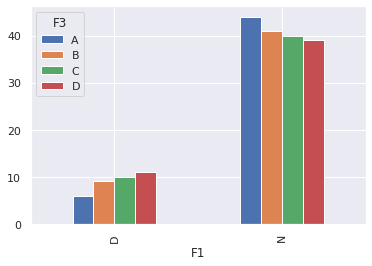

In [229]:
df1.plot(kind='bar')

In [230]:
from scipy.stats import chi2_contingency
# 귀무가설 : F1과 F3는 연관이 없다.
# 대립가설 : F1과 F3는 연관이 있다.

chi2 = chi2_contingency(df1, correction=False)
chi2 # 0.594 > 0.05 이므로 유의수준 5%에서 귀무가설을 기각할 수 없다. 


(1.897018970189702, 0.5940533789798919, 3, array([[ 9.,  9.,  9.,  9.],
        [41., 41., 41., 41.]]))

In [231]:
df2 = pd.crosstab(df['F2'], df['F3'])
df2

F3,A,B,C,D
F2,,,,
N,46,47,45,49
Y,4,3,5,1


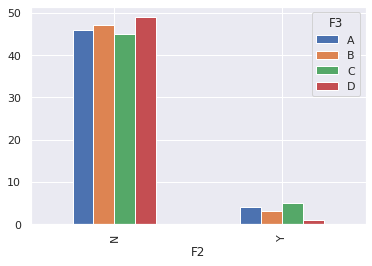

In [232]:
df2.plot(kind='bar')

In [233]:
chi2_contingency(df2, correction=False) #  0.648 > 0.05이므로 유의수준 5%에서 귀무가설을 기각할 수 없다(귀무가설 채택 : F2변수는 기수별로 연관이 없다 -> 무의미한 피쳐?)

(2.879473467708762,
 0.41058370469108096,
 3,
 array([[46.75, 46.75, 46.75, 46.75],
        [ 3.25,  3.25,  3.25,  3.25]]))

In [234]:
df6 = pd.crosstab(df['F6'], df['F3'])
df6

F3,A,B,C,D
F6,,,,
B,0,1,0,0
C,1,1,1,2
D,2,2,1,1
E,5,4,5,4
F,9,15,9,5
G,10,12,14,13
H,23,15,20,25


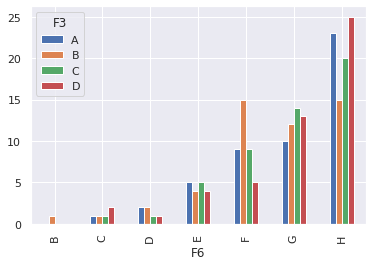

In [235]:
df6.plot(kind='bar')

In [236]:
chi2_contingency(df6, correction=False)#  0.77 > 0.05이므로 유의수준 5%에서 귀무가설을 기각할 수 없다(귀무가설(연관x) 채택)
# 카이제곱 통계량이 가장 크다. 범주형중 가장 무의마한 독립변수?

(13.306535414842326,
 0.7730503052560493,
 18,
 array([[ 0.25,  0.25,  0.25,  0.25],
        [ 1.25,  1.25,  1.25,  1.25],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.5 ,  4.5 ,  4.5 ,  4.5 ],
        [ 9.5 ,  9.5 ,  9.5 ,  9.5 ],
        [12.25, 12.25, 12.25, 12.25],
        [20.75, 20.75, 20.75, 20.75]]))

In [237]:
df8 = pd.crosstab(df['F8'], df['F3'])
df8

F3,A,B,C,D
F8,,,,
X,9,7,15,12
Y,27,28,21,23
Z,14,15,14,15


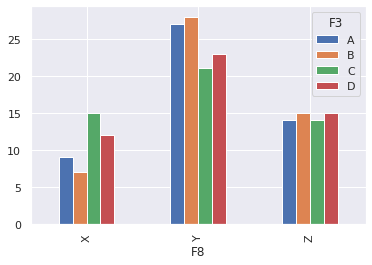

In [238]:
df8.plot(kind='bar')

In [239]:
chi2_contingency(df8, correction=False)#  0.56 > 0.05이므로 유의수준 5%에서 귀무가설을 기각할 수 없다(귀무가설(연관x) 채택)

(4.810802491636495, 0.5682982129169898, 6, array([[10.75, 10.75, 10.75, 10.75],
        [24.75, 24.75, 24.75, 24.75],
        [14.5 , 14.5 , 14.5 , 14.5 ]]))

In [240]:
df9=pd.crosstab(df['F9'], df['F3'])
df9

F3,A,B,C,D
F9,,,,
N,26,28,28,29
Y,24,22,22,21


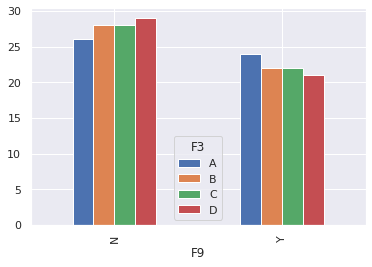

In [241]:
df9.plot(kind='bar')

In [242]:
1
chi2_contingency(df9)

(0.3846543172385869,
 0.9433939883736915,
 3,
 array([[27.75, 27.75, 27.75, 27.75],
        [22.25, 22.25, 22.25, 22.25]]))

In [243]:
#  0.94 > 0.05이므로 유의수준 5%에서 귀무가설을 기각할 수 없다(귀무가설(연관x) 채택)

### 연속형 변수 분석 (F4, F5, F7 vs F3)

In [244]:
d4 = df[['F3','F4']]
d4

,F3,F4
0,A,2.239542
1,A,1.608900
2,A,2.544409
3,A,0.782857
4,A,1.532721
...,...,...
195,D,2.765327
196,D,3.098499
197,D,1.613861
198,D,3.003789


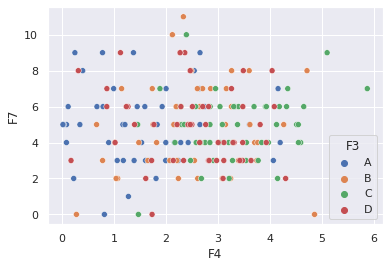

In [245]:
import seaborn as sns
sns.scatterplot(x='F4',y='F7',hue='F3',data=df)

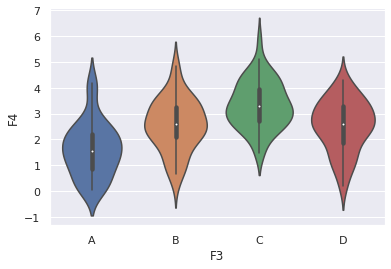

In [246]:
import pandas as pd
import seaborn as sns; sns.set()

# sns.scatterplot(x = 'F4', data=df)
# sns.scatterplot(x = hue='F3', data=d4)
# plot(df['F4'], df['F3'])
sns.violinplot(x='F3', y='F4', data=df )

In [247]:
df['F4'].groupby(df['F3']).sum()

F3
A     80.902297
B    128.184781
C    167.146561
D    126.297339
Name: F4, dtype: float64

In [248]:
df4 = df['F4'].groupby(df['F3']).mean() # 80.902297/50
df4

F3
A    1.618046
B    2.563696
C    3.342931
D    2.525947
Name: F4, dtype: float64

In [249]:
df['F4'].groupby(df['F3']).std()

F3
A    1.062936
B    1.014329
C    0.922689
D    0.994729
Name: F4, dtype: float64

In [250]:
# t-test (F4에서 가장 차이가 큰 A와 C)
import numpy as np

(1.618046 -  3.342931) / np.sqrt(    ( 1.062936**2 / 50) + (3.342931**2 / 50) ) 

-3.476994269431008

In [251]:
da = df[df['F3']=='A']
db = df[df['F3']=='B']
dc = df[df['F3']=='C']
dd = df[df['F3']=='D']

In [252]:
len(da)

50

In [253]:
df['F4'].groupby(df['F3']).describe() # 기수별로 평균의 눈에 띄게 다르다. 

,count,mean,std,min,25%,50%,75%,max
F3,,,,,,,,
A,50.0,1.618046,1.062936,0.022079,0.839382,1.564318,2.206727,4.195318
B,50.0,2.563696,1.014329,0.281257,2.089018,2.576698,3.261806,4.855501
C,50.0,3.342931,0.922689,1.458048,2.700019,3.279227,3.959240,5.868967
D,50.0,2.525947,0.994729,0.177912,1.863403,2.579349,3.282950,4.300491


In [254]:
from scipy import stats
# stats.ttest_ind(df4['A'], df4['B'])

result = stats.ttest_ind(da['F4'], dc['F4'])
print('t검정 통계량 = %.3f, pvalue = %.3f'%(result)) # 귀무가설 기각, 대립가설 채택(연관o)

t검정 통계량 = -8.665, pvalue = 0.000


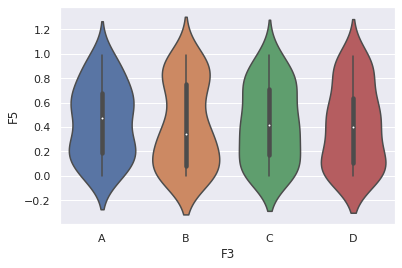

In [255]:
sns.violinplot(x='F3', y='F5', data=df )

In [256]:
df4 = df['F5'].groupby(df['F3']).mean() # 80.902297/50
df4

F3
A    0.446866
B    0.415067
C    0.430444
D    0.408395
Name: F5, dtype: float64

In [257]:
df['F5'].groupby(df['F3']).describe()

,count,mean,std,min,25%,50%,75%,max
F3,,,,,,,,
A,50.0,0.446866,0.300023,0.0,0.190393,0.473821,0.675755,0.993412
B,50.0,0.415067,0.346249,0.0,0.080414,0.341018,0.753216,0.987940
C,50.0,0.430444,0.314363,0.0,0.168231,0.416257,0.715676,0.992745
D,50.0,0.408395,0.331186,0.0,0.102618,0.397205,0.635042,0.982460


In [258]:
result = stats.ttest_ind(da['F5'], dd['F5'])
print('t검정 통계량 = %.3f, pvalue = %.3f'%(result)) # 귀무가설 채택(연관x)

t검정 통계량 = 0.609, pvalue = 0.544


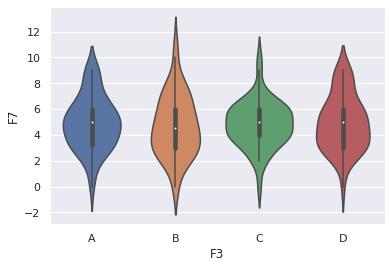

In [259]:
sns.violinplot(x='F3', y='F7', data=df )

In [260]:
df4 = df['F7'].groupby(df['F3']).mean() # 80.902297/50
df4

F3
A    4.94
B    4.70
C    4.86
D    4.94
Name: F7, dtype: float64

In [261]:
df['F7'].groupby(df['F3']).describe() # 최대값이 다른 것으로 보아 누적해서 쌓이는 총점같은 변수인 것 같다. (누적 점수?)

,count,mean,std,min,25%,50%,75%,max
F3,,,,,,,,
A,50.0,4.94,2.064372,0.0,3.25,5.0,6.0,9.0
B,50.0,4.70,2.358225,0.0,3.00,4.5,6.0,11.0
C,50.0,4.86,1.772926,0.0,4.00,5.0,6.0,10.0
D,50.0,4.94,2.122859,0.0,3.00,5.0,6.0,9.0


In [262]:
result = stats.ttest_ind(da['F7'], db['F7'])
print('t검정 통계량 = %.3f, pvalue = %.3f'%(result))  # 귀무가설 채택(연관x)

t검정 통계량 = 0.541, pvalue = 0.589


## 3. 분석한 내용들을 설명하는 리포트를 작성해보세요. 

분석의 끝은 결국 설명입니다.

통계 분석에 대한 이해도가 적은 다른 크루들이 이해 할 수 있도록 

분석한 내용들을 설명하는 리포트를 작성해보세요. 

필요한 경우 코드 / 텍스트 내용을 더 추가해도 좋습니다.

### 가장 의미있는 것으로 나타난 변수는 F4였다. 
범주형은 모두 연관이 없는 것으로 나타났고 나머지 연속형F5,7도 연관이 없는 것으로 나타났다. 이중 가장 의미없는 변수는 F6였다.

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하고, 시간이 남았다면 아래 내용을 충족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들 중 하나의 요구사항만 충족하면 되며, 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- Numerical 데이터에 대해서 normalize를 한 다음, 위에서 진행 했었던 분석을 다시 시행해보세요. (F4, F5, F7 vs F3)

- Categorical 데이터를 one-hot encoding을 통해서 numerical 로 변환 후, 위에서 진행 했었던 분석을 다시 시행해보세요. (F1, F2, F6, F8, F9 vs F3)

## 연속형 Nomalize 후 검정 (F4, F5, F7 vs F3) 


In [263]:
# 이 곳에 답안을 작성하시기 바랍니다
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   

scaler = scaler.fit_transform(df[['F4','F5','F7']])


In [264]:
len(scaler[:,0])

200

In [265]:
import pandas as pd
import numpy as np

np.random.seed(0)

# 표준화
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df[['F4','F5','F7']])
print(df_mean_norm)

           F4        F5        F7
0   -0.234210  1.084631 -0.895727
1   -0.775020 -0.907443 -0.895727
2    0.027231  0.923312  1.512141
3   -1.483398 -0.514881  1.993715
4   -0.840348 -0.440866 -0.414153
..        ...       ...       ...
195  0.216680  1.022719  0.067420
196  0.502394  0.659627 -1.377300
197 -0.770766  1.424236 -1.377300
198  0.421175  1.455161 -0.414153
199 -0.038223 -0.946401  0.067420

[200 rows x 3 columns]


In [266]:
nd =pd.concat([df['F3'], df_mean_norm],axis=1) 

In [267]:
nd

,F3,F4,F5,F7
0,A,-0.234210,1.084631,-0.895727
1,A,-0.775020,-0.907443,-0.895727
2,A,0.027231,0.923312,1.512141
3,A,-1.483398,-0.514881,1.993715
4,A,-0.840348,-0.440866,-0.414153
...,...,...,...,...
195,D,0.216680,1.022719,0.067420
196,D,0.502394,0.659627,-1.377300
197,D,-0.770766,1.424236,-1.377300
198,D,0.421175,1.455161,-0.414153


In [268]:
nd['F4'].sum() # 0
# round(-8.526512829121202e-14,3)

-8.526512829121202e-14

In [269]:
nd.describe() # 평균과 표준편차가 0과 1로, 표준정규분포 N(0,1)을 따름을 확인


,F4,F5,F7
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-4.550527e-16,3.830269e-17,-1.511985e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.135807e+00,-1.323265e+00,-2.340448e+00
25%,-6.687741e-01,-9.227980e-01,-8.957268e-01
50%,2.908194e-02,-1.016883e-01,6.742030e-02
75%,6.854265e-01,9.020419e-01,5.489939e-01
max,2.878224e+00,1.768385e+00,2.956862e+00


In [270]:
nd.groupby(['F3']).describe() 

F4                                ...        F7                              
   count      mean       std       min  ...       25%       50%       75%       max
F3                                      ...                                        
A   50.0 -0.767177  0.911526 -2.135807  ... -0.775333  0.067420  0.548994  1.993715
B   50.0  0.043770  0.869843 -1.913547  ... -0.895727 -0.173366  0.548994  2.956862
C   50.0  0.712008  0.791257 -0.904384  ... -0.414153  0.067420  0.548994  2.475288
D   50.0  0.011399  0.853036 -2.002171  ... -0.895727  0.067420  0.548994  1.993715

[4 rows x 24 columns]

가설 검정

H0 : 기수와 F4는 연관이 없다.   
H1 : 기수와 F4는 연관이 있다. 

In [271]:
# 연속형이므로 A,B,C,D의 평균이 다르다 같다로 검정. 
# 기수별 나누기
nda = nd[nd['F3']=='A']
ndb = nd[nd['F3']=='B']
ndc = nd[nd['F3']=='C']
ndd = nd[nd['F3']=='D']

In [272]:
nda[:10]

,F3,F4,F5,F7
0,A,-0.234210,1.084631,-0.895727
1,A,-0.775020,-0.907443,-0.895727
2,A,0.027231,0.923312,1.512141
3,A,-1.483398,-0.514881,1.993715
4,A,-0.840348,-0.440866,-0.414153
5,A,-1.452647,1.768385,-2.340448
6,A,-1.241236,1.135705,-0.895727
7,A,-0.194970,-1.079032,-0.414153
8,A,0.121446,0.388855,0.067420
9,A,-1.056663,0.128064,-1.858874


표준화한 F4와의 연관성 파악

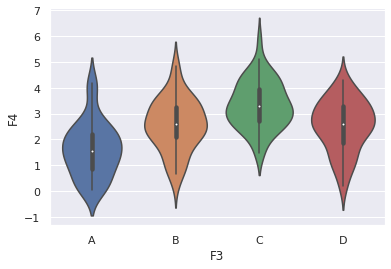

In [273]:
sns.violinplot(x='F3', y='F4', data=df ) # 기존 데이터

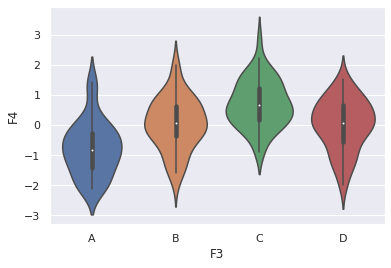

In [274]:
sns.violinplot(x='F3', y='F4', data=nd ) # 스케일된 데이터 --> 값만 바뀌었지 분포의 모양은 전혀 바뀌지 않음.

In [275]:
# t-test
result = stats.ttest_ind(nda['F4'], ndc['F4'])  # 4개의 기수중 가장 평균 차이가 크던 두 기수의 평균을 비교 
print('t검정 통계량 = %.3f, pvalue = %.3f'%(result)) # 귀무가설(평균 같음) 기각, 대립가설 채택(평균 다름) 즉, 기수 a와 기수c는  F4평균이 다르다. 

t검정 통계량 = -8.665, pvalue = 0.000


In [276]:
# t-test
result = stats.ttest_ind(ndb['F4'], ndd['F4'])  # 4개의 기수중 가장 평균 차이가 가장 작던 두 기수의 평균을 비교 
print('t검정 통계량 = %.3f, pvalue = %.3f'%(result)) # 귀무가설 채택. 즉, 기수 b와 d는 F4평균이 같다. 

t검정 통계량 = 0.188, pvalue = 0.851


4개의 기수 중 가장 평균 차이가 큰 두 그룹과 작은 그룹에 대한 t검정을 실시하였다. 

그러나 두 검정이 결과가 반대로 나와서 어떤 기수는 평균이 같고, 어떤 기수는 평균이 달랐다.

 즉, 어떤 기수인지에 따라 F4 점수가 같은 그룹도 있도 다른 그룹도 있는 것이다. 
 
**그렇다면 F4의 경우엔 적어도 한 기수는 점수가 다르고, 중요한 지표가 될 수 있다고     유추가 가능하지만 효과적으로 한번에 평균을 비교하기 위해 이후로는 아노바검정을 실시하였다.**

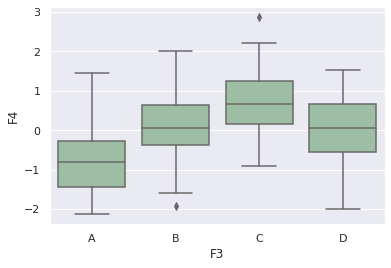

In [277]:
sns.boxplot(x='F3', y='F4', data=nd, color='#99c2a2')

In [278]:
# 아노바
F_statistic, pVal = stats.f_oneway(nda['F4'], ndb['F4'], ndc['F4'], ndd['F4'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F4점수는 수강생 데이터에서 유의미한 지표입니다.')

Altman 910 데이터의 일원분산분석 결과 : F=24.9, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.
즉, F4점수는 수강생 데이터에서 유의미한 지표입니다.


표준화한 **F5** 와의 연관성 파악

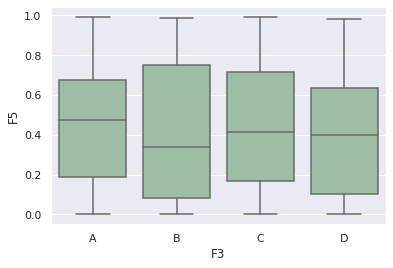

In [279]:
sns.boxplot(x='F3', y='F5', data=df, color='#99c2a2')

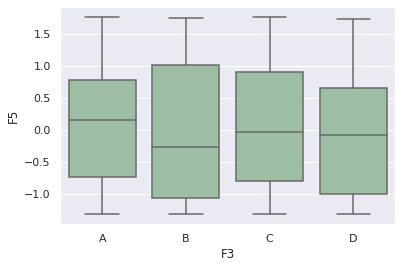

In [280]:
sns.boxplot(x='F3', y='F5', data=nd, color='#99c2a2')

In [281]:
# 아노바
F_statistic, pVal = stats.f_oneway(nda['F5'], ndb['F5'], ndc['F5'], ndd['F5'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F5점수는 수강생 데이터에서 유의미한 지표입니다.')
else:
    print('P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.')
    print('즉, F5점수는 수강생 데이터에서 유의한 지표가 아닙니다.')

Altman 910 데이터의 일원분산분석 결과 : F=0.1, p=0.93562
P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.
즉, F5점수는 수강생 데이터에서 유의한 지표가 아닙니다.


표준화한 F7 와의 연관성 파악

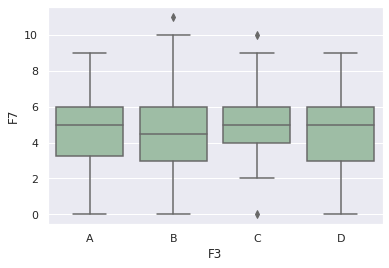

In [282]:
sns.boxplot(x='F3', y='F7', data=df, color='#99c2a2')

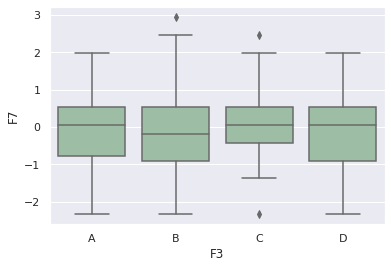

In [283]:
sns.boxplot(x='F3', y='F7', data=nd, color='#99c2a2')

In [284]:
# 아노바
F_statistic, pVal = stats.f_oneway(nda['F7'], ndb['F7'], ndc['F7'], ndd['F7'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F7점수는 수강생 데이터에서 유의미한 지표입니다.')
else:
    print('P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.')
    print('즉, F7점수는 수강생 데이터에서 유의한 지표가 아닙니다.')

Altman 910 데이터의 일원분산분석 결과 : F=0.1, p=0.93182
P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.
즉, F7점수는 수강생 데이터에서 유의한 지표가 아닙니다.


In [285]:
# 원데이터 아노바 결과와 비교 ---> 검정통계량부터 피벨류까지 완전히 똑같이 나옴.
F_statistic, pVal = stats.f_oneway(da['F7'], db['F7'], dc['F7'],dd['F7'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F7점수는 수강생 데이터에서 유의미한 지표입니다.')
else:
    print('P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.')
    print('즉, F7점수는 수강생 데이터에서 유의한 지표가 아닙니다.')

Altman 910 데이터의 일원분산분석 결과 : F=0.1, p=0.93182
P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.
즉, F7점수는 수강생 데이터에서 유의한 지표가 아닙니다.


In [286]:
# 명확한 이해를 위해 
# 원데이터와 표준화된 데이터의 두 변수간의 평균의 차 비교 #
print((np.mean(nda['F7']) - np.mean(ndb['F7']) ) / np.sqrt(np.var(ndb['F7'])))# 표준화된 데이터간의 t
(np.mean(da['F7']) - np.mean(db['F7']) ) / np.sqrt(np.var(db['F7']))  # 표준화된 데이터간의 t
# 두 데이터에서의 t통계량이 똑같다. 즉, 표준화를 한다고 해서 t통계량이 달라지지 않고 따라서 t-test검정 결과도 달라지지 않는다.

0.10280470485074854


0.10280470485074875

**두 데이터에서의 t통계량이 똑같다. 즉, 표준화를 한다고 해서 t통계량이 달라지지 않고 따라서 t-test검정 결과도 달라지지 않는다.**

--- 
## Categorical 데이터를 one-hot encoding 후 분석 (F1, F2, F6, F8, F9 vs F3)

원핫인코딩

In [287]:
df

,Unnamed: 0,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
1,2,D,N,A,1.608900,0.133612,H,3.0,X,Y
2,3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
3,4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
4,5,N,N,A,1.532721,0.283534,E,4.0,Z,Y
...,...,...,...,...,...,...,...,...,...,...
195,196,N,N,D,2.765327,0.753814,G,5.0,X,Y
196,197,N,Y,D,3.098499,0.637145,G,2.0,Y,Y
197,198,N,N,D,1.613861,0.882830,F,2.0,Z,Y
198,199,N,N,D,3.003789,0.892767,G,4.0,Z,Y


In [288]:
df['F3']
one_F1 = pd.get_dummies(df['F1'],prefix = 'Em')
one_F1

,Em_D,Em_N
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
195,0,1
196,0,1
197,0,1
198,0,1


In [289]:
onedf_F1 = pd.concat([df['F3'],one_F1], axis=1)
onedf_F1

,F3,Em_D,Em_N
0,A,0,1
1,A,1,0
2,A,0,1
3,A,0,1
4,A,0,1
...,...,...,...
195,D,0,1
196,D,0,1
197,D,0,1
198,D,0,1


In [290]:
onedf_F1.groupby('F3').mean() # 원핫인코딩 한 변수를 F3(기수)로 묶어서 평균을 내면, 결국 백분율 형태의 표이다.
# 이는 아래의 이원분류표의 백분율과 같다. 

,Em_D,Em_N
F3,,
A,0.12,0.88
B,0.18,0.82
C,0.20,0.80
D,0.22,0.78


In [291]:
onedf_F1.groupby('F3').sum() # = pd.crosstab(df['F3'], df['F1']) # 원래 이원분류표랑 같다. 

,Em_D,Em_N
F3,,
A,6,44
B,9,41
C,10,40
D,11,39


In [292]:
# 아래 3개의 코드 결과는 같다.
pd.crosstab(onedf_F1['F3'],onedf_F1['Em_N']) # = 원핫 인코딩 된 두 변수중 하나와의 이원분류표 
onedf_F1.groupby('F3').sum() # = 기수별로 나누었을 때의 합 
pd.crosstab(df['F3'], df['F1']) # 원래 이원분류표 

F1,D,N
F3,,
A,6,44
B,9,41
C,10,40
D,11,39


In [293]:
# 표준화된 데이터의 이원카이제곱검정
chi2_contingency(onedf_F1.groupby('F3').sum() , correction=False) 
# 0.594 > 0.05이므로 유의수준 5%에서 귀무가설을 기각할 수 없다(귀무가설 채택 : F1점수는 기수별로 연관이 없다 )

(1.8970189701897018, 0.5940533789798921, 3, array([[ 9., 41.],
        [ 9., 41.],
        [ 9., 41.],
        [ 9., 41.]]))

In [294]:
# 원데이터의 이원카이제곱검정
chi2_contingency(pd.crosstab(df['F3'], df['F1'])  , correction=False) 
# --> 완전히 똑같은 검정결과가 나옴, 넣은 데이터가 같기 때문에 당연하다.

(1.8970189701897018, 0.5940533789798921, 3, array([[ 9., 41.],
        [ 9., 41.],
        [ 9., 41.],
        [ 9., 41.]]))

 즉, 이 표를 쓰면 결국 같은 데이터이기 때문에 위에서 실시한 원데이터의 카이제곱 검정과 똑같은 결과가 나온다. 


 따라서 이는 원핫인코딩 한 의미없기 때문에 카이제곱 검정 대신, 아노바-test를 해보자.

In [295]:
# 모든 카테고리 변수를 원핫인코딩
onedf = pd.get_dummies(df[['F1', 'F2', 'F6', 'F8', 'F9']],prefix = ['F1', 'F2', 'F6', 'F8', 'F9'])
onedf = pd.concat([df['F3'],onedf], axis=1)
onedf

,F3,F1_D,F1_N,F2_N,F2_Y,F6_B,F6_C,F6_D,F6_E,F6_F,F6_G,F6_H,F8_X,F8_Y,F8_Z,F9_N,F9_Y
0,A,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1
1,A,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
2,A,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3,A,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,A,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,D,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1
196,D,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
197,D,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1
198,D,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1


In [296]:
# 기수별로 나누기
onedf_A = onedf[onedf['F3']=='A']
onedf_B = onedf[onedf['F3']=='B']
onedf_C= onedf[onedf['F3']=='C']
onedf_D = onedf[onedf['F3']=='D']

In [297]:
onedf_A.head()

,F3,F1_D,F1_N,F2_N,F2_Y,F6_B,F6_C,F6_D,F6_E,F6_F,F6_G,F6_H,F8_X,F8_Y,F8_Z,F9_N,F9_Y
0,A,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1
1,A,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
2,A,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3,A,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,A,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [298]:
onedf.groupby('F3').mean() # 원핫인코딩 한 변수를 F3(기수)로 묶어서 평균을 내면, 결국 crosstab의 백분율이다. 

,F1_D,F1_N,F2_N,F2_Y,F6_B,F6_C,F6_D,F6_E,F6_F,F6_G,F6_H,F8_X,F8_Y,F8_Z,F9_N,F9_Y
F3,,,,,,,,,,,,,,,,
A,0.12,0.88,0.92,0.08,0.00,0.02,0.04,0.10,0.18,0.20,0.46,0.18,0.54,0.28,0.52,0.48
B,0.18,0.82,0.94,0.06,0.02,0.02,0.04,0.08,0.30,0.24,0.30,0.14,0.56,0.30,0.56,0.44
C,0.20,0.80,0.90,0.10,0.00,0.02,0.02,0.10,0.18,0.28,0.40,0.30,0.42,0.28,0.56,0.44
D,0.22,0.78,0.98,0.02,0.00,0.04,0.02,0.08,0.10,0.26,0.50,0.24,0.46,0.30,0.58,0.42


원핫인코딩 된 2~6개의 범주 중에서 하나의 범주에 대해서 평균을 비교해보자. 
* 만약, 범주가 Y/N이었던 F1의 경우 Y의 비율의 평균이 같다면 결국 N의 비율의 평균도 같을 것이므로 하나만 하면 될 것이다.
* 또한, 범주가 B~H로 7개인 F6의 경우 평균이 가장 차이나는 범주로 비교를 해서 차이가 크면 의미가 있는 것이고, 그마저도 차이가 없다면 의미가 없다고 생각한다.

ANOVA

In [299]:
# F1
F_statistic, pVal = stats.f_oneway(onedf_A['F1_N'], onedf_B['F1_N'], onedf_C['F1_N'], onedf_D['F1_N'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F1_N점수는 수강생 데이터에서 유의미한 지표입니다.')
else:
    print('P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.')
    print('즉, F1_N점수는 수강생 데이터에서 유의한 지표가 아닙니다.')

Altman 910 데이터의 일원분산분석 결과 : F=0.6, p=0.59924
P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.
즉, F1_N점수는 수강생 데이터에서 유의한 지표가 아닙니다.


In [300]:
# F2
F_statistic, pVal = stats.f_oneway(onedf_A['F2_Y'], onedf_B['F2_Y'], onedf_C['F2_Y'], onedf_D['F2_Y'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F2_Y점수는 수강생 데이터에서 유의미한 지표입니다.')
else:
    print('P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.')
    print('즉, F2_Y점수는 수강생 데이터에서 유의한 지표가 아닙니다.')

Altman 910 데이터의 일원분산분석 결과 : F=1.0, p=0.41540
P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.
즉, F2_Y점수는 수강생 데이터에서 유의한 지표가 아닙니다.


In [301]:
# F6

F_statistic, pVal = stats.f_oneway(onedf_A['F6_F'], onedf_B['F6_F'], onedf_C['F6_F'], onedf_D['F6_F'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F6_F점수는 수강생 데이터에서 유의미한 지표입니다.')

##-- 0.05보단 작지만 귀무가설(평균 같다)이 맞을 확률이 0.08(8%)이므로 다른 변수들에 비해서 그나마 의미가 있다고 볼 수 있다.!

Altman 910 데이터의 일원분산분석 결과 : F=2.2, p=0.08498


In [302]:
# F8

F_statistic, pVal = stats.f_oneway(onedf_A['F8_X'], onedf_B['F8_X'], onedf_C['F8_X'], onedf_D['F8_X'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F8_X점수는 수강생 데이터에서 유의미한 지표입니다.')
else:
    print('P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.')
    print('즉, F8_X점수는 수강생 데이터에서 유의한 지표가 아닙니다.')

Altman 910 데이터의 일원분산분석 결과 : F=1.5, p=0.22835
P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.
즉, F8_X점수는 수강생 데이터에서 유의한 지표가 아닙니다.


In [303]:
# F9

F_statistic, pVal = stats.f_oneway(onedf_A['F9_N'], onedf_B['F9_N'], onedf_C['F9_N'], onedf_D['F9_N'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
    print('즉, F9_N점수는 수강생 데이터에서 유의미한 지표입니다.')
else:
    print('P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.')
    print('즉, F9_N점수는 수강생 데이터에서 유의한 지표가 아닙니다.')

Altman 910 데이터의 일원분산분석 결과 : F=0.1, p=0.94469
P-value가 0.05보다 크므로 그룹의 평균값이 통계적으로 유의미하게 차이가 난다고 할 수 없습니다.
즉, F9_N점수는 수강생 데이터에서 유의한 지표가 아닙니다.


### 결론 
: 의외로 원데이터에서는 가장 의미없다고 나온 F6점수가 원핫인코딩 시에는 그나마 의미가 있는 것으로 나왔다.  
이는 가장 차이나는 범주(A~H 중 'F')만을 가지고 비교해서 의미가 있는 것인지 확실하진 않지만, 원핫인코딩에 따라 또 다른 인사이트를 발견할 수 있겠다는 것을 느꼈다.  
**(그냥 카운트해서 만든 교차빈도표는 원데이터와 똑같아지기 때문에 검정 결과가 똑같고 따라서 검정에서 제외하였다. 이에 추가적으로 t-test를 실시하였다.)**

**반대로 연속형을 표준화한 경우에는 값만 달라졌을 뿐이지 분포와 검정결과는 똑같았다. 
그래서인지 t-test나 아노바 검정 결과도 똑같이 나왔다. 
t-test는 두 변수의 평균의 차이를 표준화한 값을 지표로 삼는데 표준화를 한다고 해서 표준화된 두 변수의 t통계량의 값이 달라지지 않아서 이다.**

